### Import libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

### Preprocessing

##### Dataset 2019

In [54]:
# Import file
data_2019 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2019.csv", header=None)

# Remove rows 0, 1, and 2 which contain the titles and descriptions of the dataset
data_2019 = data_2019.drop([0, 1, 2])

# Reset index
data_2019.reset_index(drop=True, inplace=True)

# Replace missing values ('-') with NaN
data_2019.replace('-', pd.NA, inplace=True)

# Drop NaN values 
data_2019.dropna(inplace=True)

# Rename features to ['Province'] + ['{month}_2019'] * 12 + ['Annual']
new_features = ['province'] + [f'{month}_{year}' for month, year in zip(['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'], ['2019'] * 12)] + ['annual']
data_2019.columns = new_features

# Drop unnecessary column (Annual)
data_2019.drop(columns=['annual'], inplace=True)

# Display data after renaming columns
print(data_2019.columns)
print(data_2019.shape)
print(data_2019.head())


Index(['province', 'january_2019', 'february_2019', 'march_2019', 'april_2019',
       'may_2019', 'june_2019', 'july_2019', 'august_2019', 'september_2019',
       'october_2019', 'november_2019', 'december_2019'],
      dtype='object')
(35, 13)
         province january_2019 february_2019 march_2019 april_2019 may_2019  \
1            ACEH      1387574       1111607    1113176    1155705  1070909   
2  SUMATERA UTARA      5094564       3282713    3442407    3676763  3469100   
3  SUMATERA BARAT      1667509       1313185    1420799    1573606  1511963   
4            RIAU      1990985       1425092    1541155    1563303  1574681   
5           JAMBI       828879        652908     716028     547378   438508   

  june_2019 july_2019 august_2019 september_2019 october_2019 november_2019  \
1   1800152   1323272     1508073        1174513      1219323       1198958   
2   5774370   3996409     3699782        3208776      3419415       3416228   
3   2910574   1719018     1207708        

#### Dataset 2020

In [55]:
# Import file
data_2020 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2020.csv", header=None)

# Remove rows 0, 1, and 2 which contain the titles and descriptions of the dataset
data_2020 = data_2020.drop([0, 1, 2])

# Reset index
data_2020.reset_index(drop=True, inplace=True)

# Replace missing values ('-') with NaN
data_2020.replace('-', pd.NA, inplace=True)

# Drop NaN values 
data_2020.dropna(inplace=True)

# Rename features to ['Province'] + ['{month}_2020'] * 12 + ['Annual']
new_features = ['province'] + [f'{month}_{year}' for month, year in zip(['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'], ['2020'] * 12)] + ['annual']
data_2020.columns = new_features

# Drop unnecessary column (Province, Annual)
data_2020.drop(columns=['province', 'annual'], inplace=True)

# Display data after renaming columns
print(data_2020.columns)
print(data_2020.shape)
print(data_2020.head())

Index(['january_2020', 'february_2020', 'march_2020', 'april_2020', 'may_2020',
       'june_2020', 'july_2020', 'august_2020', 'september_2020',
       'october_2020', 'november_2020', 'december_2020'],
      dtype='object')
(35, 12)
  january_2020 february_2020 march_2020 april_2020 may_2020 june_2020  \
1       483897        430589     351710     157764   258310    298482   
2      2012511       1466193    1109440     442072   576278    864667   
3       863282        779785     623248     226466   250931    562966   
4       619363        548129     464347     215636   249411    390121   
5       264201        250082     206088     114969   133020    183620   

  july_2020 august_2020 september_2020 october_2020 november_2020  \
1    333571      392055         293602       340415        322558   
2   1082687     1291700        1016798      1232110       1120288   
3    754303      827245         555478       672099        661261   
4    440119      497048         422867       52092

#### Dataset 2021

In [56]:
# Import file
data_2021 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2021.csv", header=None)

# Remove rows 0, 1, and 2 which contain the titles and descriptions of the dataset
data_2021 = data_2021.drop([0, 1, 2])

# Reset index
data_2021.reset_index(drop=True, inplace=True)

# Replace missing values ('-') with NaN
data_2021.replace('-', pd.NA, inplace=True)

# Drop NaN values 
data_2021.dropna(inplace=True)

# Rename features to ['Province'] + ['{month}_2021'] * 12 + ['Annual']
new_features = ['province'] + [f'{month}_{year}' for month, year in zip(['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'], ['2021'] * 12)] + ['annual']
data_2021.columns = new_features

# Drop unnecessary column (Province, Annual)
data_2021.drop(columns=['province', 'annual'], inplace=True)

# Display data after renaming columns
print(data_2021.columns)
print(data_2021.shape)
print(data_2021.head())

Index(['january_2021', 'february_2021', 'march_2021', 'april_2021', 'may_2021',
       'june_2021', 'july_2021', 'august_2021', 'september_2021',
       'october_2021', 'november_2021', 'december_2021'],
      dtype='object')
(35, 12)
  january_2021 february_2021 march_2021 april_2021 may_2021 june_2021  \
1       396953        421243     445804     378402   599117    457822   
2      1424081       1375473    1415803    1369304  1674445   1571487   
3       775782        735587     793796     712644  1025889    894952   
4       507998        482533     511576     451372   501143    521519   
5       247256        225630     239867     226476   280176    255590   

  july_2021 august_2021 september_2021 october_2021 november_2021  \
1    445355      397120         440652       490983        445046   
2   1127318     1139616        1329028      1641459       1433761   
3    664848      635405         717460       829981        733146   
4    486997      418261         480952       54238

#### Dataset 2022

In [57]:
# Import file
data_2022 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2022.csv", header=None)

# Remove rows 0, 1, and 2 which contain the titles and descriptions of the dataset
data_2022 = data_2022.drop([0, 1, 2])

# Reset index
data_2022.reset_index(drop=True, inplace=True)

# Replace missing values ('-') with NaN
data_2022.replace('-', pd.NA, inplace=True)

# Drop NaN values 
data_2022.dropna(inplace=True)

# Rename features to ['Province'] + ['{month}_2022'] * 12 + ['Annual']
new_features = ['province'] + [f'{month}_{year}' for month, year in zip(['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'], ['2022'] * 12)] + ['annual']
data_2022.columns = new_features

# Drop unnecessary column (Province, Annual)
data_2022.drop(columns=['province', 'annual'], inplace=True)

# Display data after renaming columns
print(data_2022.columns)
print(data_2022.shape)
print(data_2022.head())

Index(['january_2022', 'february_2022', 'march_2022', 'april_2022', 'may_2022',
       'june_2022', 'july_2022', 'august_2022', 'september_2022',
       'october_2022', 'november_2022', 'december_2022'],
      dtype='object')
(35, 12)
  january_2022 february_2022 march_2022 april_2022 may_2022 june_2022  \
1       526417        501651     585675     434633   935025    566361   
2      2022964       1636066    1846809    1658463  2896949   1987624   
3       926043        814741    1007630     838560  1655583    988346   
4       636543        581783     673534     597000   897026    692293   
5       302504        255285     313009     310853   449078    316554   

  july_2022 august_2022 september_2022 october_2022 november_2022  \
1    748573      531072         500673       513056        471520   
2   2216932     1678953        1664991      1785747       1525633   
3   1176922      905311         891560       949081        877671   
4    795698      662795         677309       69232

#### Dataset 2023

In [58]:
# Import file
data_2023 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2023.csv", header=None)

# Remove rows 0, 1, and 2 which contain the titles and descriptions of the dataset
data_2023 = data_2023.drop([0, 1, 2])

# Reset index
data_2023.reset_index(drop=True, inplace=True)

# Replace missing values ('-') with NaN
data_2023.replace('-', pd.NA, inplace=True)

# Drop NaN values 
data_2023.dropna(inplace=True)

# Rename features to ['Province'] + ['{month}_2023'] * 12 + ['Annual']
new_features = ['province'] + [f'{month}_{year}' for month, year in zip(['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'], ['2023'] * 12)] + ['annual']
data_2023.columns = new_features

# Drop unnecessary column (Province, Annual)
data_2023.drop(columns=['province', 'annual'], inplace=True)

# Display data after renaming columns
print(data_2023.columns)
print(data_2023.shape)
print(data_2023.head())

Index(['january_2023', 'february_2023', 'march_2023', 'april_2023', 'may_2023',
       'june_2023', 'july_2023', 'august_2023', 'september_2023',
       'october_2023', 'november_2023', 'december_2023'],
      dtype='object')
(35, 12)
  january_2023 february_2023 march_2023 april_2023 may_2023 june_2023  \
1       663437        517850     557272     756915   791968    701963   
2      2962641       1870691    1852752    2673955  2556839   2416258   
3      1345098       1024017    1056957    1373374  1538507   1407632   
4       914340        729078     759760     935938   977332   1016640   
5       380949        293566     302700     414742   421741    424987   

  july_2023 august_2023 september_2023 october_2023 november_2023  \
1    871519      618671         565184       588020        637519   
2   2462212     1889717        1847654      1958158       1870337   
3   1413899     1072952        1083013      1121805        904282   
4   1048542      893939         866457       90825

#### Merging the 2019-2023 dataset

In [59]:
# Combining datasets using concat
data = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023], axis=1)

# Removing the last row which contains the total number of trips
data = data.drop(data.index[-1])

# Displaying the features present in the dataset
print("Total features:", data.shape[1])
print(data.columns)
print(data.head())

Total features: 61
Index(['province', 'january_2019', 'february_2019', 'march_2019', 'april_2019',
       'may_2019', 'june_2019', 'july_2019', 'august_2019', 'september_2019',
       'october_2019', 'november_2019', 'december_2019', 'january_2020',
       'february_2020', 'march_2020', 'april_2020', 'may_2020', 'june_2020',
       'july_2020', 'august_2020', 'september_2020', 'october_2020',
       'november_2020', 'december_2020', 'january_2021', 'february_2021',
       'march_2021', 'april_2021', 'may_2021', 'june_2021', 'july_2021',
       'august_2021', 'september_2021', 'october_2021', 'november_2021',
       'december_2021', 'january_2022', 'february_2022', 'march_2022',
       'april_2022', 'may_2022', 'june_2022', 'july_2022', 'august_2022',
       'september_2022', 'october_2022', 'november_2022', 'december_2022',
       'january_2023', 'february_2023', 'march_2023', 'april_2023', 'may_2023',
       'june_2023', 'july_2023', 'august_2023', 'september_2023',
       'october_20

### Feature engineering

#### Creating growth_rate feature for each province

In [60]:
# Converting numeric columns (starting from index 1) to numeric type
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Calculating the total visits per year for each province
total_2019 = data.iloc[:, 1:13].sum(axis=1)  # Total for 2019
total_2020 = data.iloc[:, 13:25].sum(axis=1)  # Total for 2020
total_2021 = data.iloc[:, 25:37].sum(axis=1)  # Total for 2021
total_2022 = data.iloc[:, 37:49].sum(axis=1)  # Total for 2022
total_2023 = data.iloc[:, 49:61].sum(axis=1)  # Total for 2023

# Calculating the Growth Rate from year to year
data['growth_rate_2020'] = (
    (total_2020 - total_2019) / total_2019.replace(0, pd.NA) * 100
)
data['growth_rate_2021'] = (
    (total_2021 - total_2020) / total_2020.replace(0, pd.NA) * 100
)
data['growth_rate_2022'] = (
    (total_2022 - total_2021) / total_2021.replace(0, pd.NA) * 100
)
data['growth_rate_2023'] = (
    (total_2023 - total_2022) / total_2022.replace(0, pd.NA) * 100
)

# Extracting growth rate data from 2020 to 2023
growth_rates = data[['growth_rate_2020', 'growth_rate_2021', 'growth_rate_2022', 'growth_rate_2023']].mean(axis=1)
data.head()


,province,january_2019,february_2019,march_2019,april_2019,may_2019,june_2019,july_2019,august_2019,september_2019,...,july_2023,august_2023,september_2023,october_2023,november_2023,december_2023,growth_rate_2020,growth_rate_2021,growth_rate_2022,growth_rate_2023
1,ACEH,1387574,1111607,1113176,1155705,1070909,1800152,1323272,1508073,1174513,...,871519,618671,565184,588020,637519,1673468,-73.550631,33.610957,25.660807,28.602857
2,SUMATERA UTARA,5094564,3282713,3442407,3676763,3469100,5774370,3996409,3699782,3208776,...,2462212,1889717,1847654,1958158,1870337,3251911,-70.688632,26.425443,30.669089,18.999234
3,SUMATERA BARAT,1667509,1313185,1420799,1573606,1511963,2910574,1719018,1207708,1011691,...,1413899,1072952,1083013,1121805,904282,1350709,-58.020593,21.679065,28.481633,19.069064
4,RIAU,1990985,1425092,1541155,1563303,1574681,2179811,1646721,1227426,1018291,...,1048542,893939,866457,908253,762348,1334426,-70.248789,11.579717,36.803972,32.636125
5,JAMBI,828879,652908,716028,547378,438508,572785,498688,620967,580974,...,433896,375376,368132,386128,371185,609785,-62.816269,13.507045,24.08191,26.50644


#### Creating and importing new data

In [61]:
# Creating a CSV file from the preprocessed data
data.to_csv('Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2019-2023.csv', index=False)

# Importing data using the preprocessed file
data = pd.read_csv('Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2019-2023.csv')
data

,province,january_2019,february_2019,march_2019,april_2019,may_2019,june_2019,july_2019,august_2019,september_2019,...,july_2023,august_2023,september_2023,october_2023,november_2023,december_2023,growth_rate_2020,growth_rate_2021,growth_rate_2022,growth_rate_2023
0,ACEH,1387574,1111607,1113176,1155705,1070909,1800152,1323272,1508073,1174513,...,871519,618671,565184,588020,637519,1673468,-73.550631,33.610957,25.660807,28.602857
1,SUMATERA UTARA,5094564,3282713,3442407,3676763,3469100,5774370,3996409,3699782,3208776,...,2462212,1889717,1847654,1958158,1870337,3251911,-70.688632,26.425443,30.669089,18.999234
2,SUMATERA BARAT,1667509,1313185,1420799,1573606,1511963,2910574,1719018,1207708,1011691,...,1413899,1072952,1083013,1121805,904282,1350709,-58.020593,21.679065,28.481633,19.069064
3,RIAU,1990985,1425092,1541155,1563303,1574681,2179811,1646721,1227426,1018291,...,1048542,893939,866457,908253,762348,1334426,-70.248789,11.579717,36.803972,32.636125
4,JAMBI,828879,652908,716028,547378,438508,572785,498688,620967,580974,...,433896,375376,368132,386128,371185,609785,-62.816269,13.507045,24.081910,26.506440
5,SUMATERA SELATAN,1763349,1294947,1356470,1099872,917156,1380350,848202,1265112,1121514,...,1013893,867202,867562,858520,725317,1373335,-61.304972,17.105093,24.387649,29.463280
6,BENGKULU,414287,304721,336570,287546,258241,407898,292552,353997,347174,...,241961,199228,204566,209482,187859,680801,-62.905392,16.465606,19.368462,39.906957
7,LAMPUNG,2082997,1612674,1606207,1164672,877643,1653991,992730,1422192,1191629,...,1293197,997673,1030417,1058924,894880,1544279,-49.915071,7.637406,19.057029,25.947921
8,KEP. BANGKA BELITUNG,298322,240226,255054,199678,122301,178462,148190,182592,171412,...,234099,206938,188694,173431,137343,400977,-60.228961,10.132730,48.348056,50.973038
9,KEP. RIAU,434786,351865,358547,360392,358416,460205,413445,286867,244300,...,211471,180206,179288,186323,166685,285542,-82.579122,12.083328,80.854929,51.883411


#### Calculating descriptive statistics

In [62]:
stats = data.describe().T.round(2)
stats

,count,mean,std,min,25%,50%,75%,max
january_2019,34.0,1787771.79,2440059.92,90789.00,338613.50,813625.00,1934076.00,11116072.00
february_2019,34.0,1311435.97,1899786.67,48019.00,256349.75,651720.00,1380377.50,9942434.00
march_2019,34.0,1666740.24,2457786.79,84467.00,275433.00,709047.50,1589944.00,11088052.00
april_2019,34.0,1701670.35,2673674.52,102283.00,237821.00,662101.50,1571030.25,11993275.00
may_2019,34.0,1516139.29,2273896.83,109827.00,241131.25,670567.00,1435722.00,10148348.00
...,...,...,...,...,...,...,...,...
december_2023,34.0,2663318.50,4511819.20,101473.00,466937.75,1039626.50,1951240.25,19993585.00
growth_rate_2020,34.0,-54.21,31.70,-82.58,-70.58,-62.86,-51.42,51.49
growth_rate_2021,34.0,21.45,14.56,-6.94,11.12,19.39,30.13,58.73
growth_rate_2022,34.0,59.03,88.56,-25.28,19.13,27.16,46.96,395.25


##### Mean of domestic tourist visits per month

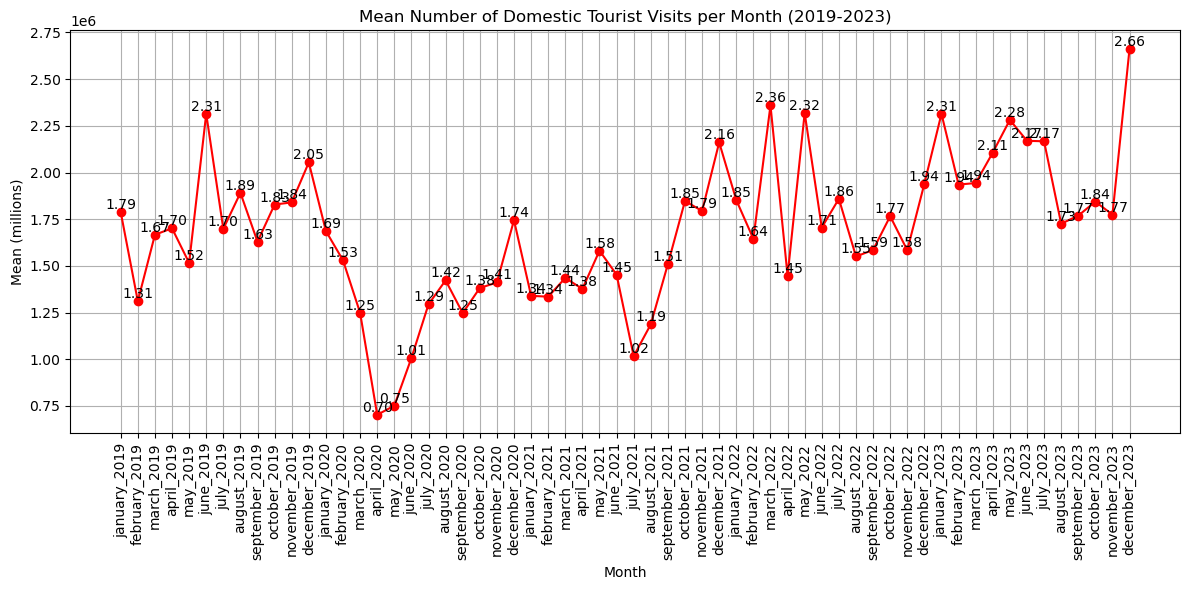

In [63]:
# Calculating the mean for each column
mean = data.iloc[:, 1:-4].mean().round(2)

# Creating a mean plot
plt.figure(figsize=(12, 6))
plt.plot(mean, marker='o', color='r')

# Adding numbers to each point on the plot
for i, value in enumerate(mean):
    plt.text(i, value, f'{value/1e6:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Mean Number of Domestic Tourist Visits per Month (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Mean (millions)')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()


#### Median of domestic tourist visits per month

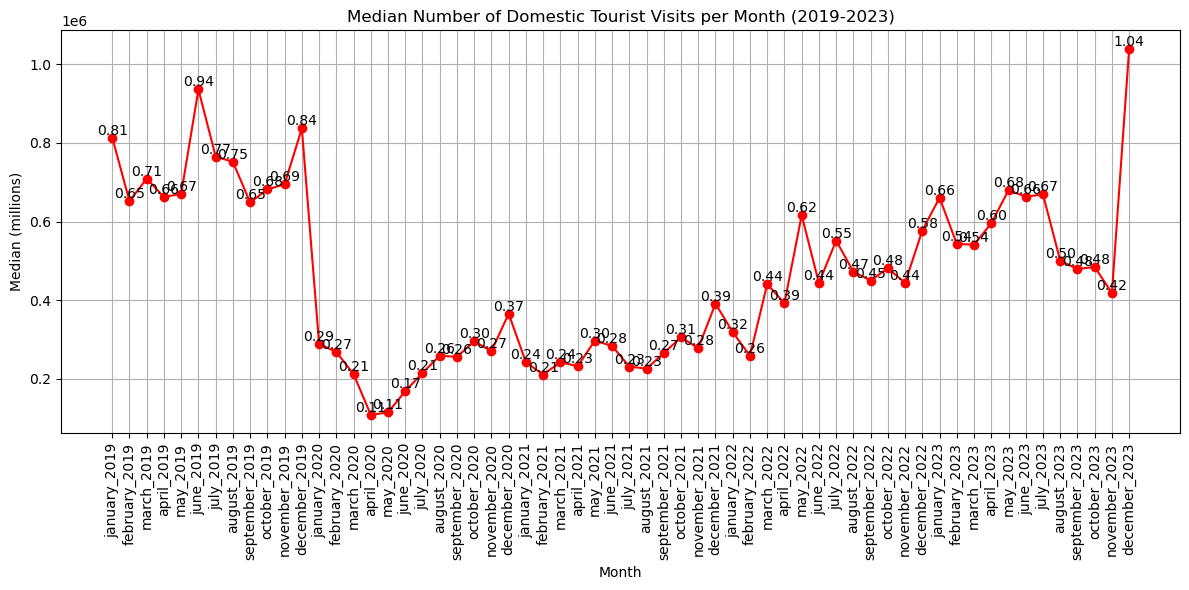

In [64]:
# Calculating the median for each column
median = data.iloc[:, 1:-4].median().round(2)

# Creating a median plot
plt.figure(figsize=(12, 6))
plt.plot(median, marker='o', color='r')

# Adding numbers to each point on the plot
for i, value in enumerate(median):
    plt.text(i, value, f'{value/1e6:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Median Number of Domestic Tourist Visits per Month (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Median (millions)')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Standard deviation of domestic tourist visits per month

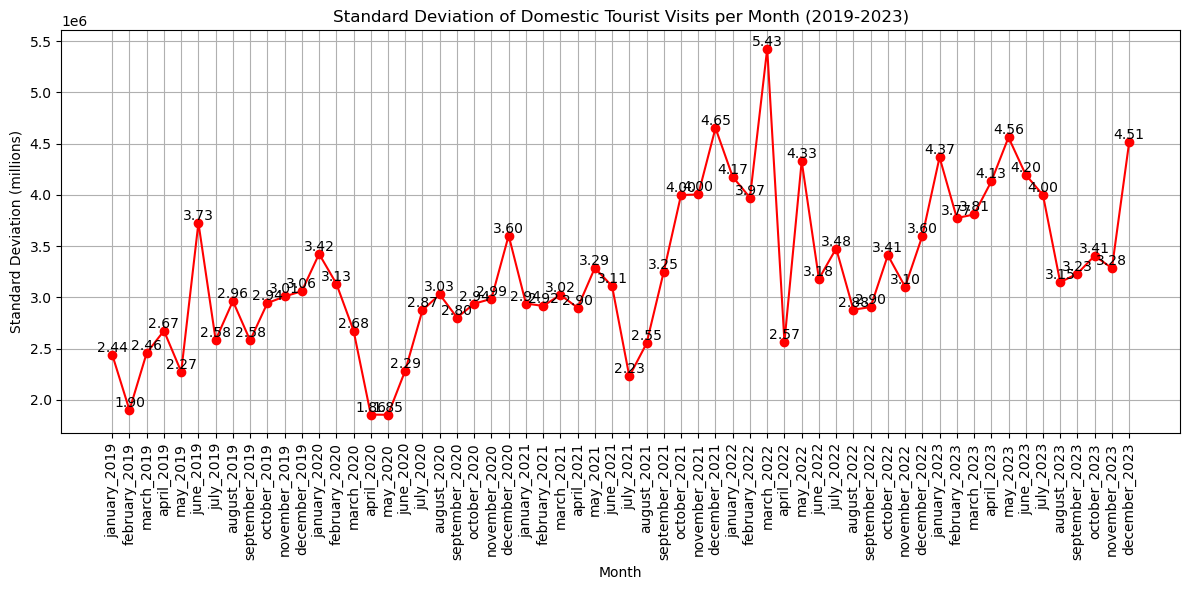

In [65]:
# Calculating the standard deviation
std = data.iloc[:, 1:-4].std().round(2)

# Creating a standard deviation plot
plt.figure(figsize=(12, 6))
plt.plot(std, marker='o', color='r')

# Adding numbers to each point on the plot
for i, value in enumerate(std):
    plt.text(i, value, f'{value/1e6:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Standard Deviation of Domestic Tourist Visits per Month (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Standard Deviation (millions)')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Min and max of domestic tourist visits per month

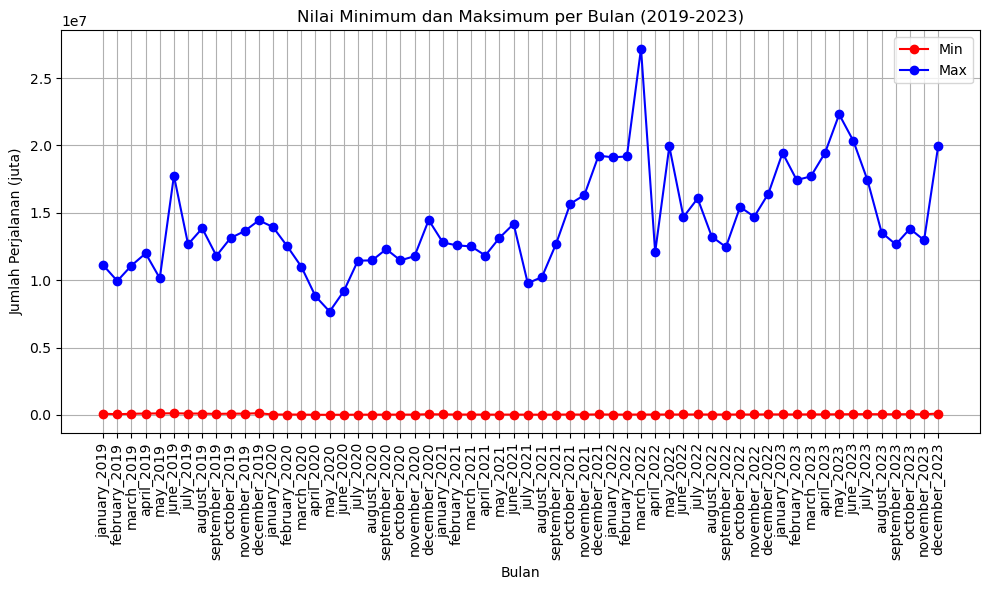

In [66]:
# Menghitung nilai minimum dan maksimum
min_data = data.iloc[:, 1:-4].min()
max_data = data.iloc[:, 1:-4].max()

# Plot minimum dan maksimum
plt.figure(figsize=(10, 6))
plt.plot(min_data, marker='o', color='red', label='Min')
plt.plot(max_data, marker='o', color='blue', label='Max')

plt.title('Nilai Minimum dan Maksimum per Bulan (2019-2023)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Perjalanan (juta)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Melakukan normalisasi data

In [67]:
# Normalisasi data menggunakan MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data.iloc[:, 1:])
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns[1:])
# data = data_scaled

# # Menampilkan data yang sudah dinormalisasi
# data